In [1]:
# PROBLEM 0 a)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.optimize import fsolve 
from scipy.interpolate import interp1d

x = [0, 1, 2.3611, 2.9033, 3.2859, 3.5915]
n = len(x)
i = 0
y = np.zeros(n)

def func1(y):
    k = x[i]
    return k**3 - math.sqrt(y) - y 

while i < n:
    y[i] = fsolve(func1, 0)
    i += 1   

print(y)

[ 0.          0.38196601 10.00031654 20.00019592 30.00100142 40.00161657]


In [3]:
# PROBLEM 0 b)

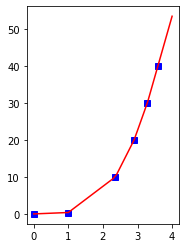

In [4]:
x = [0, 1, 2.3611, 2.9033, 3.2859, 3.5915]
y = [0.000, 0.3820, 10.00, 20.00, 30.00, 40.00]


T = interp1d(x,y,fill_value="extrapolate")
P = np.linspace(0,4,41)
N = T(P)

plt.subplot(121)
plt.plot(x,y,'bs')
plt.plot(P,N,'r-')
plt.show()

In [5]:
# PROBLEM 0 b) c) and d)

[0.00000000e+00 9.98004986e-07 6.29960320e-05 6.92105322e-04
 3.64297096e-03 1.26275643e-02 3.33580734e-02 7.29350677e-02
 1.39073886e-01 2.39555712e-01 3.81966011e-01 5.73621775e-01
 8.21586121e-01 1.13271102e+00 1.51368211e+00 1.97105672e+00
 2.51129379e+00 3.14077642e+00 3.86582888e+00 4.69272920e+00
 5.62771868e+00 6.67700908e+00 7.84678810e+00 9.14322362e+00
 1.05724670e+01 1.21406556e+01 1.38539152e+01 1.57183612e+01
 1.77401002e+01 1.99252313e+01 2.22798467e+01 2.48100329e+01
 2.75218709e+01 3.04214369e+01 3.35148029e+01 3.68080372e+01
 4.03072045e+01 4.40183662e+01 4.79475808e+01 5.21009044e+01
 5.64843902e+01] 

0.0 0.381966011250104 10.572466980020048 19.925231270496205 30.42143685096737 40.30720448545884


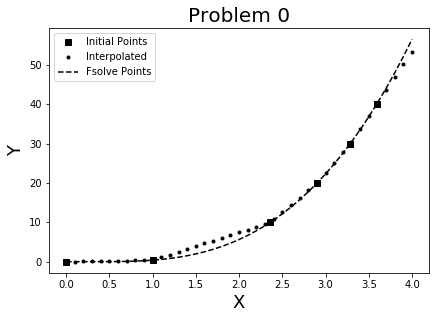

C:\Users\allan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars


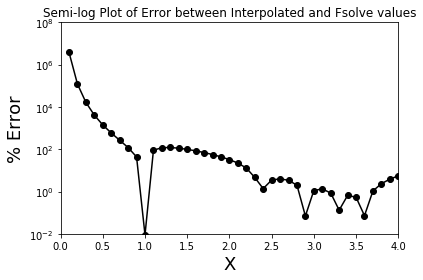

0.382 0.381966011250104


In [6]:
# initialization
x_new = np.zeros(41)
n_new = len(x_new)
y_new = np.zeros(n_new)
i = 0
scale = 1.5

# making the x array
arraycount = 0

while arraycount < n_new:
    x_new[0] = 0
    x_new[arraycount] = x_new[arraycount-1] + 0.1
    arraycount += 1
    
# checking the x array
#print(x_new)

# solving for corresponding y values
def func1(y):
    k = x_new[i]
    return k**3 - math.sqrt(y) - y 

while i < n_new:
    y_new[i] = fsolve(func1, 0)
    i += 1   

# checking values of y
print(y_new,'\n')
print(y_new[0],y_new[10],y_new[24],y_new[29],y_new[33],y_new[36])
#expect values around (0,0.38,10,20,30,40)

# Plot of data:
# initial points, and interpolated points
x = [0, 1, 2.3611, 2.9033, 3.2859, 3.5915]
y = [0.000, 0.3820, 10.00, 20.00, 30.00, 40.00]


T = interp1d(x,y,fill_value="extrapolate")
P = np.linspace(0,4,41)
N = T(P)

plt.figure(figsize = (10*scale,3*scale))
plt.subplot(121)
plt.plot(x,y,'ks',label = 'Initial Points') # initial points as black squares
plt.plot(P,N,'k.',label = 'Interpolated') # interpolated points as black dots
plt.plot(x_new,y_new,'k--',label = 'Fsolve Points') # fsolve values as black dashed line

# labelling plot
plt.xlabel('X', fontsize = 18)
plt.ylabel('Y', fontsize = 18)
plt.title('Problem 0', fontsize = 20)
plt.legend()
plt.show()
plt.tight_layout()

# ------------------------------------------------------------------------
# Part d)

err = np.zeros(41)
t = 0

while t < n_new:
    err[t] = abs((N[t] - y_new[t])/y_new[t])*100
    t += 1
    
plt.yscale('log')
plt.axis([0,4,10e-3,10e7])
plt.plot(x_new,err,'k-o')
plt.xlabel('X',fontsize = 18)
plt.ylabel('% Error',fontsize = 18)
plt.title("Semi-log Plot of Error between Interpolated and Fsolve values" )
plt.tight_layout()
plt.show()
print(N[10],y_new[10])

In [ ]:
# PROBLEM 0 e)  
"""The gap in the line at x = 1 is due to the y-values being very similar 
to eachother. Since the interpolated data and fsolve calculated values are
so close to zero, the error is aproximately zero. The percent error 
approaching 1 is so large since the denominator of the error function 
is very small (Due to the curve of the fsolve values approaching 0). The 
linear approximation will always be larger than the fsolve values due to 
the concavity of the function and thus the difference between the two 
functions is divided by basically zero causing large error."""